## Social Networking Ads Dataset 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as am
 

from sklearn.preprocessing import StandardScaler

In [39]:
x=pd.read_csv("C:/Users/admin/Downloads/Social_Network_Ads.csv ")
df=pd.DataFrame(x)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [40]:
df.shape

(400, 5)

In [41]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [42]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [43]:
for i in df:
    if df[i].dtype==object:
        from sklearn.preprocessing import LabelEncoder
        label=LabelEncoder()
        df[i]=label.fit_transform(df[i])

In [44]:
x=df.drop(["Purchased","Age"],axis=1)
y=df.iloc[:,4]

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 3), (80, 3), (320,), (80,))

In [47]:
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [48]:
# KNN 

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
y_pred=model.predict(x_test)
y_pred_train=model.predict(x_train)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7375

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[47, 11],
       [10, 12]], dtype=int64)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82        58
           1       0.52      0.55      0.53        22

    accuracy                           0.74        80
   macro avg       0.67      0.68      0.68        80
weighted avg       0.74      0.74      0.74        80



In [53]:
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [55]:
y_proba=model.predict_proba(x_test)
y_predicted=y_proba[:,1]
print(y_predicted)

[0.  0.4 0.2 0.2 0.4 0.2 0.8 0.8 0.  0.6 0.  0.  0.2 0.  0.  0.4 0.  0.
 0.6 0.6 0.6 1.  0.2 0.6 1.  1.  0.4 0.  0.2 0.6 0.8 0.4 0.  0.2 0.  0.
 0.2 0.2 0.2 0.6 0.4 0.  0.6 0.2 0.8 0.2 0.2 0.8 0.2 0.6 0.8 1.  0.2 1.
 0.4 0.2 0.4 0.4 0.2 0.4 0.4 0.2 0.2 0.2 0.4 0.2 0.8 0.  0.4 0.2 0.8 0.
 0.  0.2 0.2 0.4 0.2 0.  0.2 0.6]


In [56]:
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [57]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.7025862068965516


Text(0, 0.5, 'True positive rate(Sensitivity)')

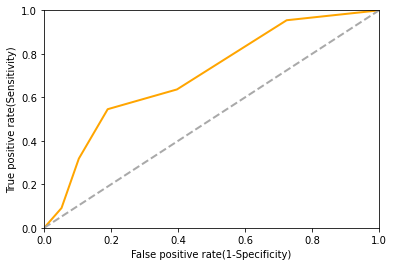

In [58]:
#plotting the roc_curve

plt.figure()
plt.plot(fpr,tpr,color='orange', lw=2, label='ROC curve(area  under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False positive rate(1-Specificity)")
plt.ylabel("True positive rate(Sensitivity)")